<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/DataMining2024_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Assignment 2


In [ ]:
# !wget https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/patches_256.zip
# !unzip /content/patches_256.zip -d /content/

## Download and load expression data into a dataframe

This data can be read using this code (not to be changed). Each row in the resulting data frame contains information about a single spot such as its spatial location coordinates (Location_Center_Y, Location_Center_X) and the expression values of 38 different proteins. The names of the proteins are given in the list “proteins_names”.  The code  also creates two additional columns 'specimen_id' and 'image_id' which will be needed for this assignment. df.specimen_id contains the identifier or name of the specimen (A1, B1, C1 or D1) from which the spot originates.  df.image_id contains the file name of the image file corresponding to each spot (without the png extension).

Note there may be some images for which no expression is available. You can drop those images.


In [ ]:
import pandas as pd
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df.set_index('image_id', inplace=True, drop=False)
df.sort_index(inplace=True)
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
# Filter training data based on groups A1, B1, D1
train = df[df['specimen_id'].isin(['A1', 'B1', 'D1'])]

# Filter test data based on group C1
test = df[df['specimen_id'] == 'C1']
print(df)


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [ ]:
print(train)

          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [ ]:
print(test)

          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
C1_0x100        2571  CAATCCATTATCCGTT-1-C1         160.318004   
C1_0x102        4056  CGGAGTCCTAACCTGG-1-C1         248.511554   
C1_0x104        2144  ATCTCATAAACCTACC-1-C1         358.228846   
C1_0x106        9739  TTGCAGGTCATGAAGT-1-C1         437.981691   
C1_0x108        7464  TAATCAGGAATGCTGC-1-C1         532.616041   
...              ...                    ...                ...   
C1_9x91         2582  CAATGGAATCTACATA-1-C1         795.333127   
C1_9x93         2257  ATGGCTGGAAATGGCC-1-C1         888.061857   
C1_9x95         7873  TATCACCATGTAAAGT-1-C1         797.685130   
C1_9x97          369  AAGCGGCGTCATGGGT-1-C1          78.190623   
C1_9x99         6407  GGCTGAGCATCGTAAG-1-C1         175.376254   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

# Showing an example image

The code below will load an example image. It also shows how you can get the HED channels.

skimage version 0.21.0


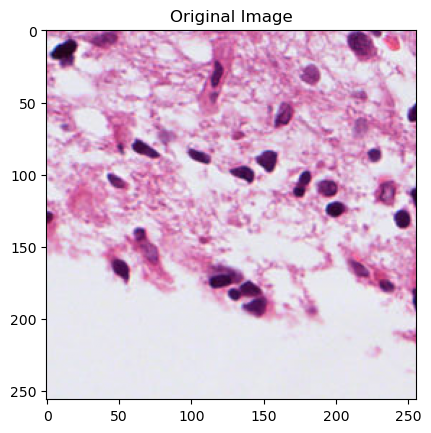

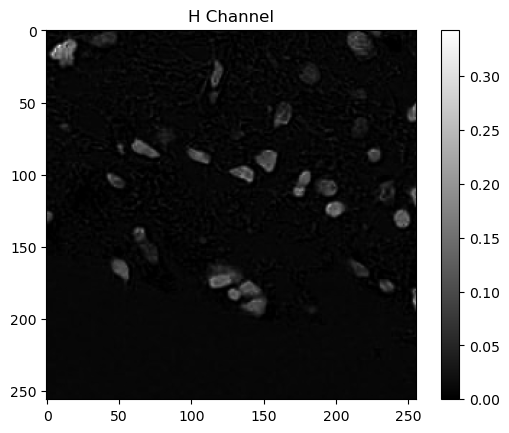

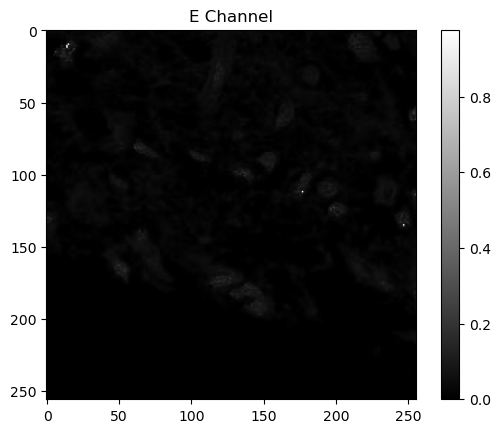

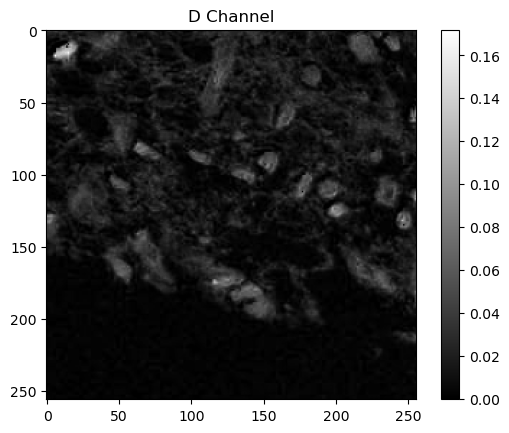

In [ ]:
image_folder = 'patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'A1_0x40.png'
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = rgba2rgb(imread(image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()


## Useful hints:
* Feel free to resize the images to reduce the amount of required compute. However, if you do this, please ensure that the code for doing this is included in your submission notebook.

* Look at glob (https://docs.python.org/3/library/glob.html) to get list of all file names in a given folder.

* For calculating various regression metrics, please see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


# Question No. 1: (Data Analysis)

# i. Counting Examples: Determine the number of "examples" or spots present in each specimen.


In [ ]:
# Count the number of spots per specimen for training data
spots_per_specimen = train.groupby('specimen_id').size()

# Count the number of spots per specimen for testing data
spots_per_specimen_test = test.groupby('specimen_id').size()

# Convert to DataFrame for a better table format
spots_per_specimen_df = spots_per_specimen.reset_index(name='Number of Spots')
spots_per_specimen_test_df = spots_per_specimen_test.reset_index(name='Number of Spots')

(spots_per_specimen_df, spots_per_specimen_test_df)

(  specimen_id  Number of Spots
 0          A1             2894
 1          B1             1145
 2          D1             1753,
   specimen_id  Number of Spots
 0          C1             4129)

The number of spots in each specimen is as follows:

Specimen A1: 2894 spots
Specimen B1: 1145 spots
Specimen D1: 1753 spots
Specimen C1: 4129 spots

# ii. Protein Expression Histograms: For each specimen, generate histograms to visualize the expression values of 'NESTIN', 'cMYC', and 'MET' and discuss your observations.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Define the proteins of interest and the colors for each specimen
proteins_of_interest = ['NESTIN', 'cMYC', 'MET']
specimen_colors = {'A1': 'blue', 'B1': 'black', 'D1': 'yellow'}

# Now, for each protein, we will generate a histogram per specimen.
for protein in proteins_of_interest:
    # Set up the matplotlib figure and axes
    plt.figure(figsize=(10, 8))

    # Use a loop to plot a histogram for each specimen
    for specimen in train['specimen_id'].unique():
        # Get the expression data for the current specimen and protein
        specimen_data = train[train['specimen_id'] == specimen][protein]

        # Plot the histogram with a specified color and a black border for each bin
        plt.hist(specimen_data, bins=20, alpha=0.5, edgecolor='black',
                 label=f'Specimen {specimen}', color=specimen_colors[specimen])

    # Add title and labels
    plt.title(f'Histogram of {protein} expression')
    plt.xlabel(f'Expression level of {protein}')
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


**After analysing the expression levels of the proteins NESTIN, cMYC, and MET across three different specimens labeled A1, B1, and D1**






**NESTIN Expression Histogram:**



1.   The histogram for NESTIN shows a roughly normal distribution for each specimen
2.   Specimen A1 have reached a peak around -1 which indicates a moderate expression levels with a narrow distribution.
3.   Specimen B1 have reached a peak around -1 and has a wider distribution suggesting lower NESTIN expression levels compared to A1.
4.   Same as A1, Specimen D1 have also reached a peak around -1 and has a broader distribution, but with a greater spread indicating more variability in NESTIN expression.


**cMYC Expression Histogram:**



1.   The histogram for MYC expression is twisted right, particularly for specimens A1 and B1.
2.   Specimen A1 has its most of the expression level around 0;however, it has a long tail extending towards higher expression levels.
3.   Specimen B1 have reached a peak around 0 with a less pronounced tail compared to A1 which indicates a fewer cells with very high cMYC expression.
4.   comparing A1 and B1, specimen D1 has a different pattern with a peak around -1 and has a much shorter tail, indicating overall lower cMYC expression levels.



**MET Expression Histogram:**


1.   Same as cMYC expression the histogram for MET expression shows a twisted right distribution for all specimens.
2.   Specimen A1 have reached a peak around 0 with a long tail, similar to the cMYC pattern for this specimen, indicating that some cells have high MET expression.
3.   Specimen B1 have reached a peak closer to -1 with a tail extending towards higher expression levels, although not as pronounced as A1.
4.   Same as cMYC histogram, here also Specimen D1 have reached a peak around -2 and a shorter tail, suggesting it has the lowest MET expression of the three specimens.



**Overall:**


1.   The specimens exhibit different patterns of expression for each protein, which could be indicative of their cellular heterogeneity or the biological conditions from which the specimens were obtained.

2.   Specimen A1 generally shows higher expression levels of both cMYC and MET.
3.   Specimen B1 tends to have lower expression levels of cMYC and MET compared to A1.
4.   Specimen D1 consistently shows lower expression levels for all three proteins.



# iii. Image Pre-processing: Convert a selection of images from RGB to HED color space, focusing on the Hematoxylin channel (H) to highlight cellular nuclei. Provide visual examples and follow the hints in the provided notebook.

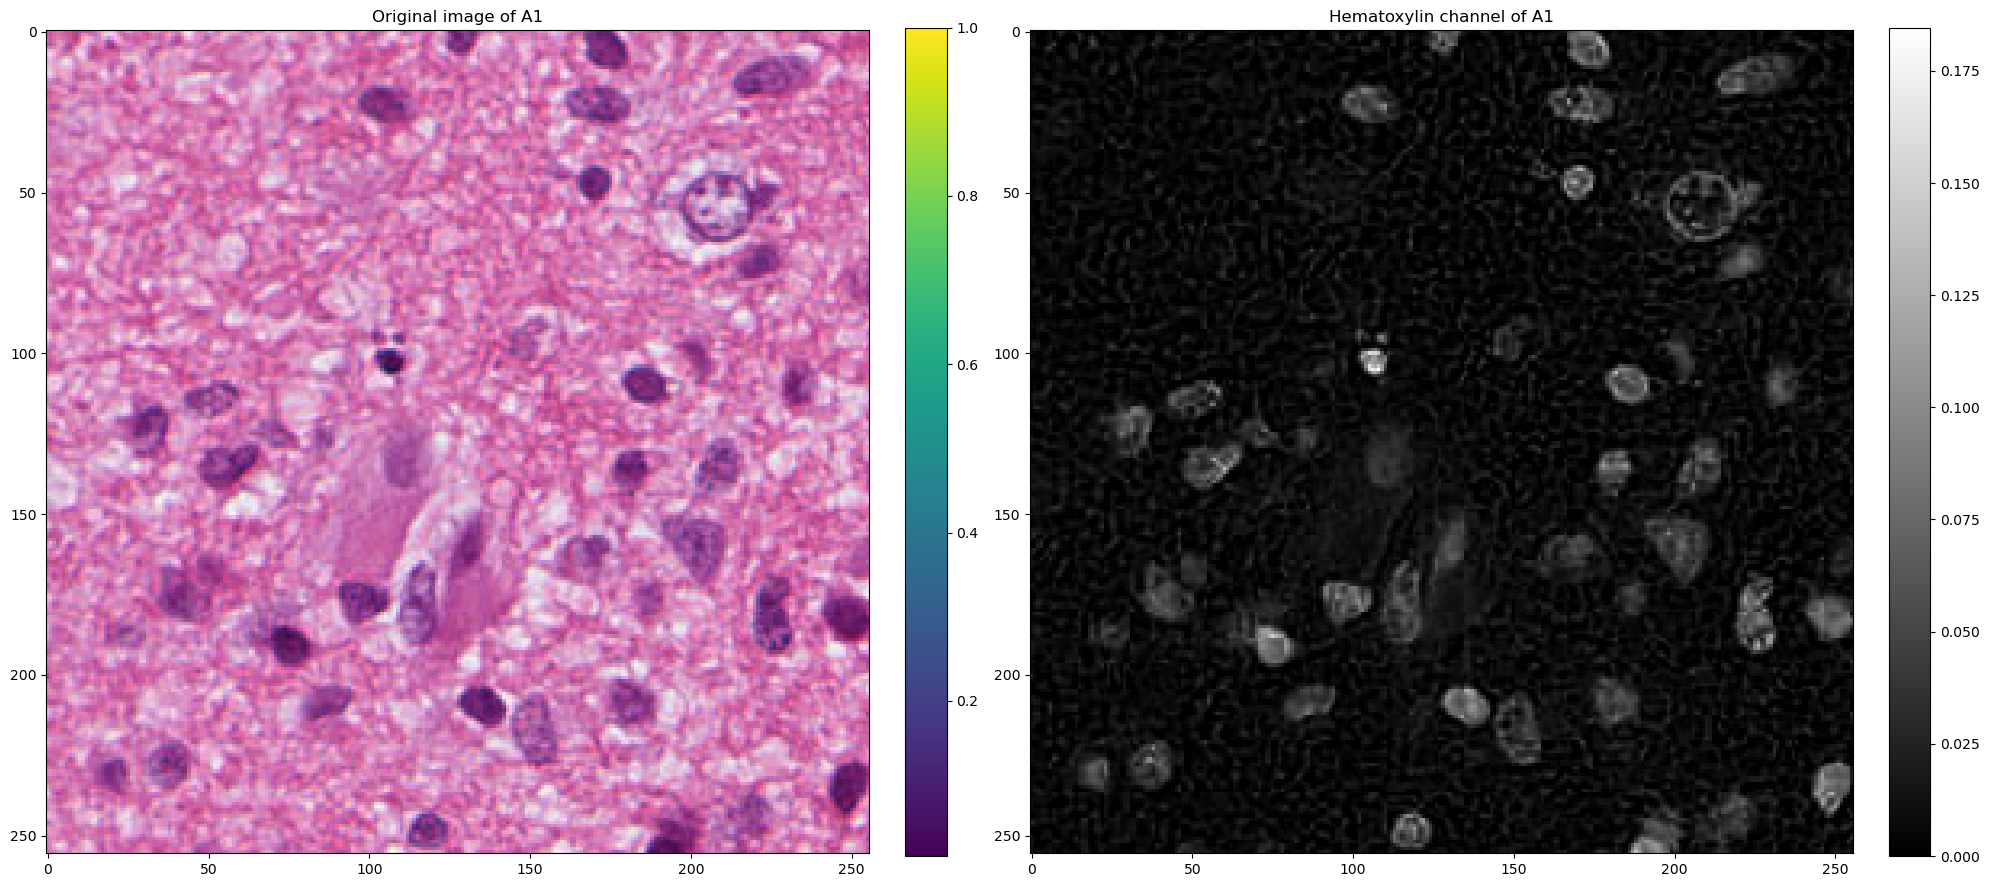

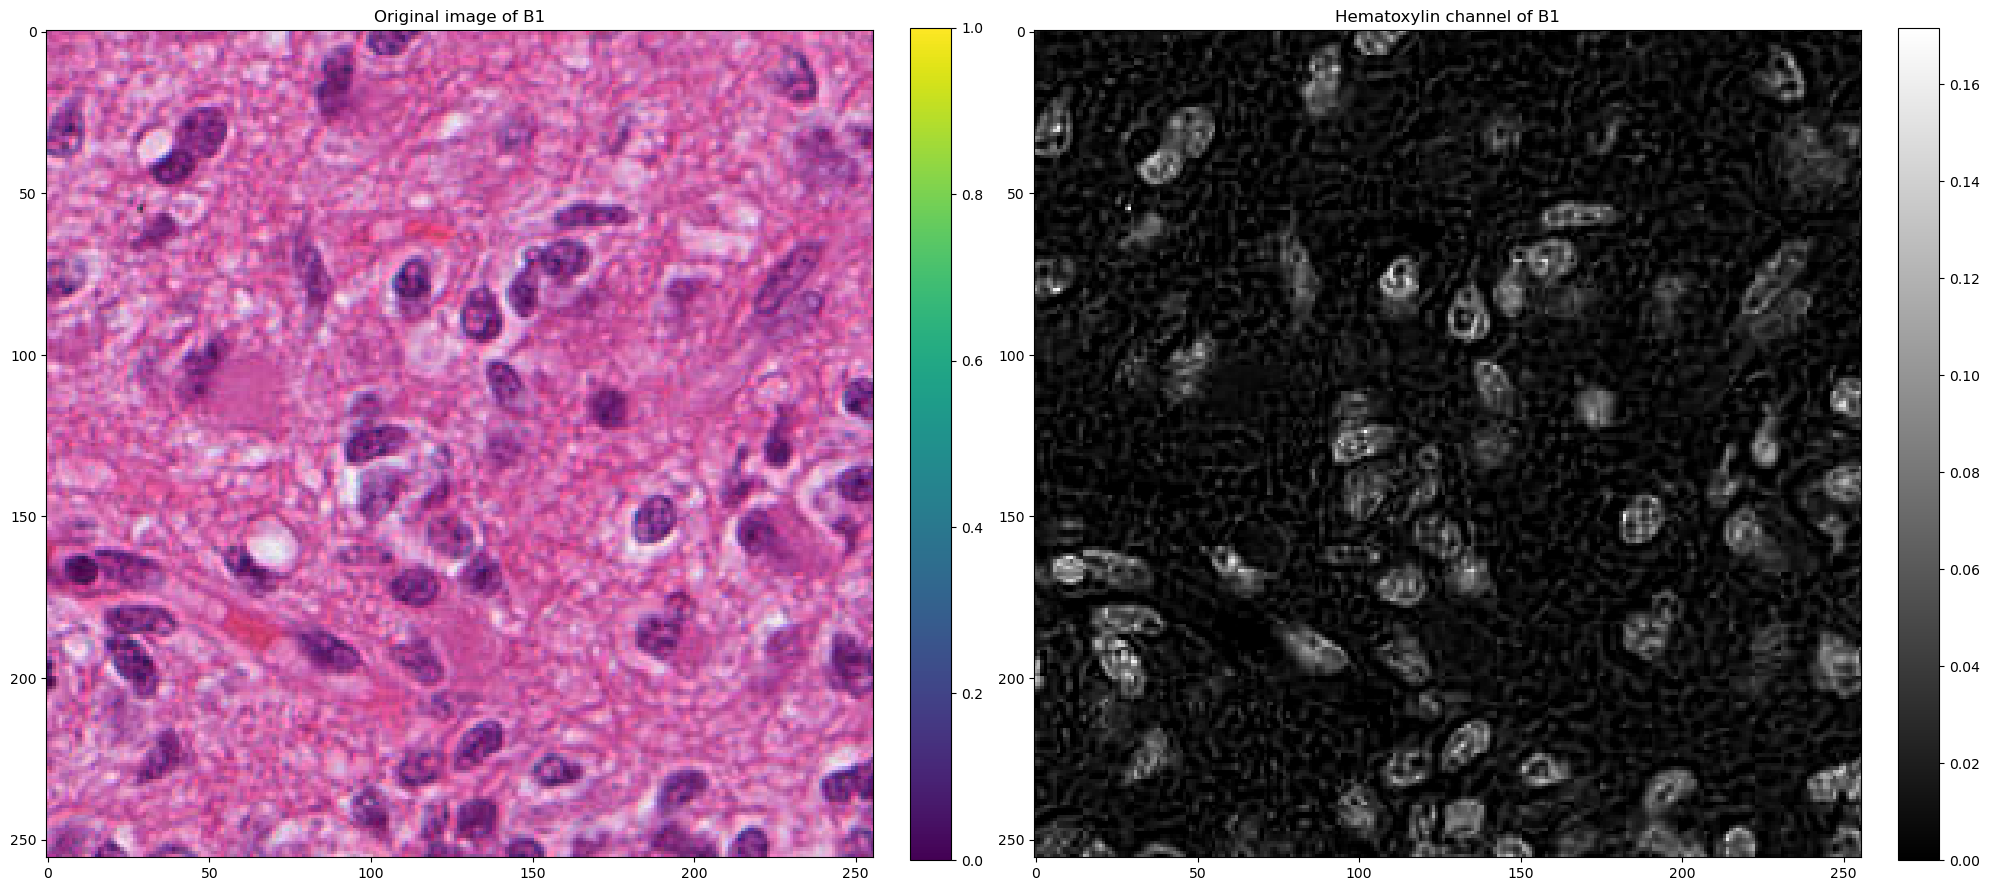

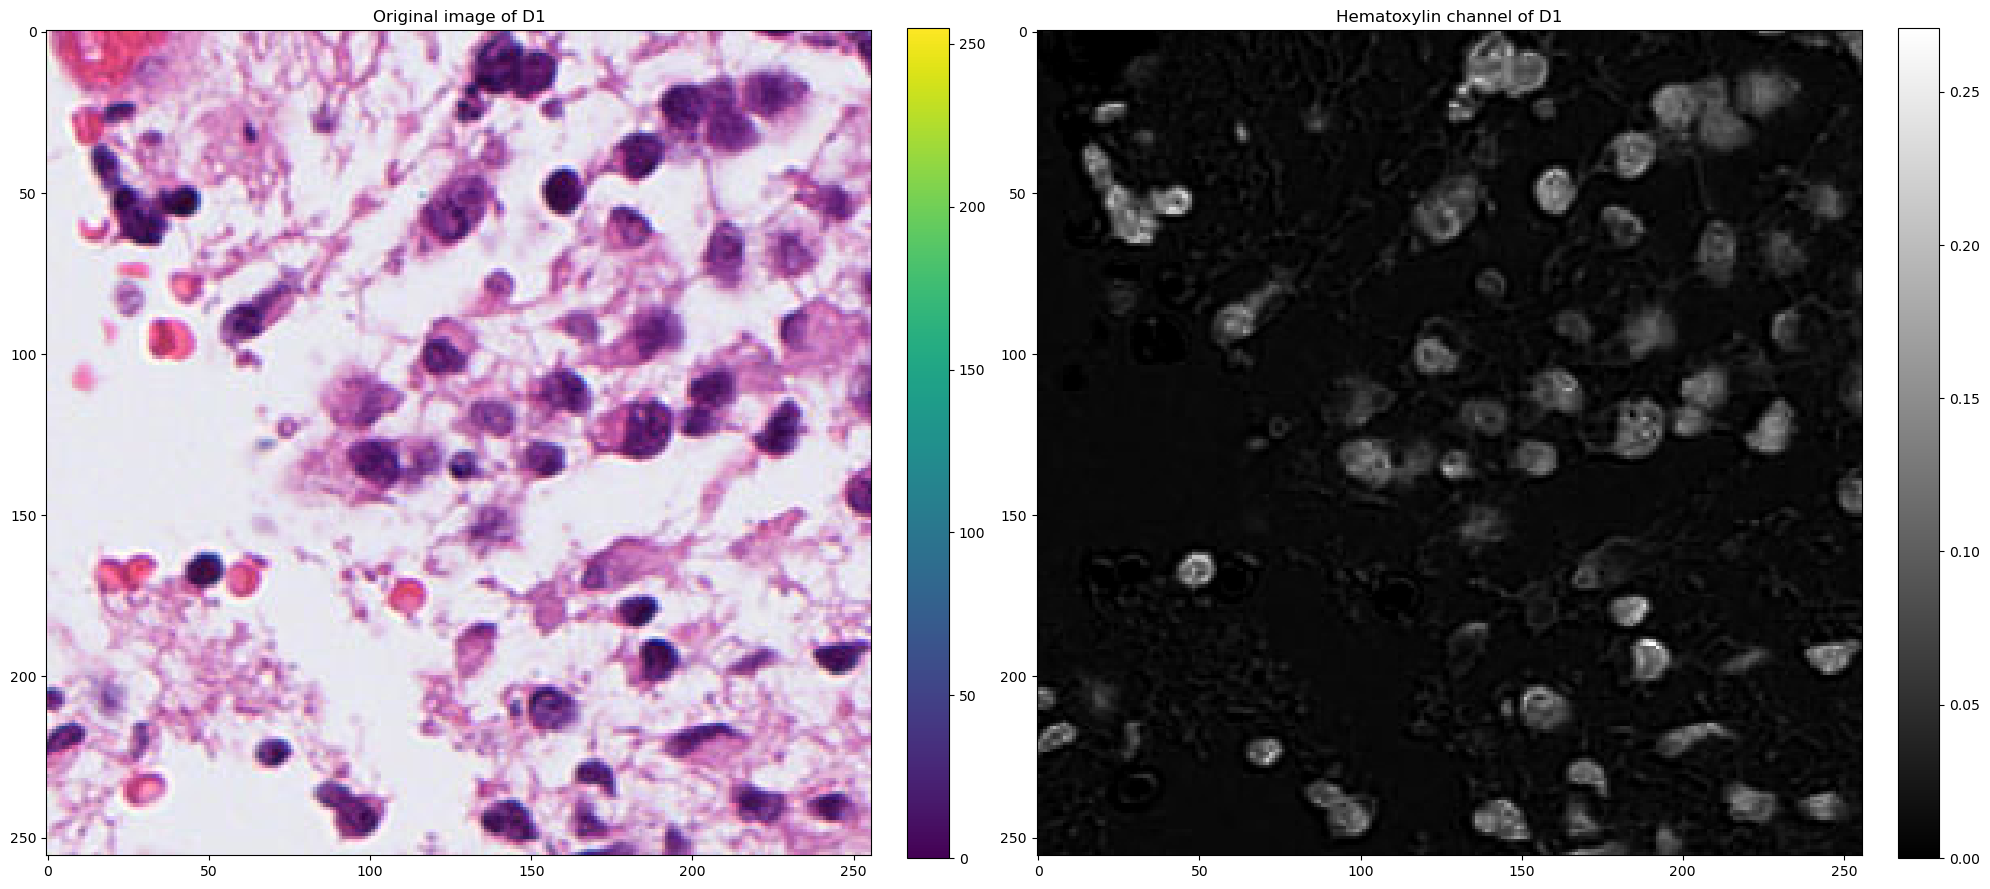

In [ ]:
import random
import os
from skimage import io
from skimage.color import rgb2hed, rgba2rgb
import matplotlib.pyplot as plt

# Define your image folder path
images_dir = 'patches_256/'  # Make sure this is your directory path

# List all files in the directory and filter out the image files
all_files = os.listdir(images_dir)
image_files = [file for file in all_files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Separate files based on specimen ID assuming naming convention includes the specimen ID
specimens = {'A1': [], 'B1': [], 'D1': []}
for file in image_files:
    for spec_id in specimens:
        if spec_id in file:
            specimens[spec_id].append(file)

# Select one random image from each specimen
selected_images = {spec: random.choice(files) for spec, files in specimens.items() if files}

# Function to convert an RGB image to HED and extract the Hematoxylin channel
def convert_to_hematoxylin_channel(image_path):
    # Read the image
    rgb_image = io.imread(image_path)

    # If the image has an alpha channel, convert it to RGB
    if rgb_image.shape[2] == 4:
        rgb_image = rgba2rgb(rgb_image)

    # Convert the RGB image to HED color space
    hed_image = rgb2hed(rgb_image)

    # Extract the Hematoxylin channel
    h_channel = hed_image[:, :, 0]

    return rgb_image, h_channel

# Plot original and H channel images side by side with color bars
for spec_id, filename in selected_images.items():
    # Construct the full file path
    image_path = os.path.join(images_dir, filename)

    # Convert to HED and extract the Hematoxylin channel
    original_image, h_channel = convert_to_hematoxylin_channel(image_path)

    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the original image
    ax1 = axes[0]
    im1 = ax1.imshow(original_image)
    ax1.set_title(f'Original image of {spec_id}')
    # Add color bar for the original image, adjust to match the image
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    # Plot the Hematoxylin channel
    ax2 = axes[1]
    im2 = ax2.imshow(h_channel, cmap='gray')
    ax2.set_title(f'Hematoxylin channel of {spec_id}')
    # Add color bar for the H channel image, adjust to match the image
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    # Display the plots
    plt.tight_layout()
    plt.show()


**Observations from the Hematoxylin channel images:**



1.   The Hematoxylin channel successfully draws attention to each specimen's cell nuclei. Because hematoxylin binds to nucleic acids, the nuclei in the grayscale photos may be seen in deeper tones.
2.   The nuclei show up as lighter regions against a dark backdrop in all of the Hematoxylin channel photos. Nuclei may be easily identified and quantified for pathological investigation or other cell research because to this contrast.
3.   There appears to be variation in the Hematoxylin channel staining intensity between the nuclei, which might be related to the different amounts of nuclear material present or the stage of the cell cycle.
4.   The nuclei of Specimens A1, B1, and D1 are all clearly identifiable, however there appears to be variation in the nuclei's density between the specimens. This variation may be brought about by variations in tissue type, disease, or sample processing.

**After converting the image from RGB to HED color space by only focusing on Hematoxylin channel helped me to analyse the images by counting cells, analyzing the nuclear morphology, and assessing the distribution of cells across the tissue.**



# iv. H-channel Analysis: Calculate the average intensity of the H-channel for each image. Create a scatter plot comparing these averages against the expression levels of NESTIN for each image. Assess the correlation between H-channel intensity and NESTIN expression. Discuss the potential of H-channel average as a predictive feature for NESTIN expression.

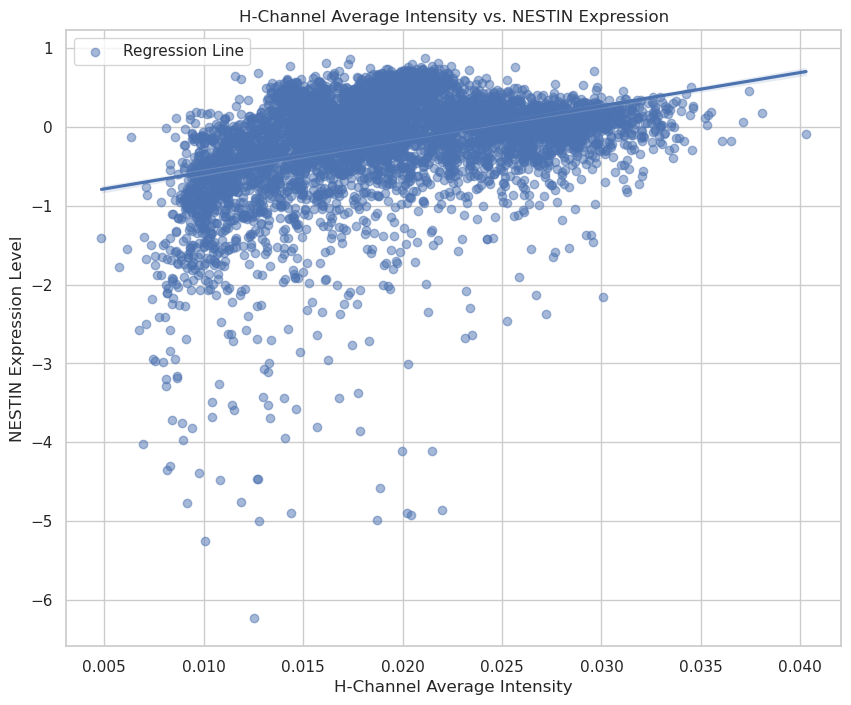

Correlation coefficient: 0.379616309866266


In [ ]:
import pandas as pd
import numpy as np
import os
from skimage.io import imread
from skimage.color import rgb2hed, rgba2rgb
import matplotlib.pyplot as plt
import seaborn as sns

image_folder = 'patches_256/'
protein_of_interest = 'NESTIN'

# Identifiers to filter the images by
identifiers = ['A1', 'B1', 'D1']

# Initialize lists to store H-channel averages and protein expressions
h_channel_avgs = []
protein_expressions = []

for image_id, row in train.iterrows():
    # Check if any of the identifiers are present in the image ID
    if any(identifier in image_id for identifier in identifiers):
        image_path = os.path.join(image_folder, image_id + '.png')
        if os.path.isfile(image_path):
            image = imread(image_path)
            if image.shape[-1] == 4:
                image = rgba2rgb(image)  # Convert RGBA to RGB if necessary
            image_hed = rgb2hed(image)
            h_avg = np.mean(image_hed[:, :, 0])  # H-channel average intensity
            h_channel_avgs.append(h_avg)
            protein_expressions.append(row[protein_of_interest])

# Create a DataFrame from the collected data
analysis_df = pd.DataFrame({
    'H_channel_avg': h_channel_avgs,
    protein_of_interest: protein_expressions
})

# Remove rows with NaN values in either 'H_channel_avg' or protein expression
analysis_df.dropna(inplace=True)

# Set style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x='H_channel_avg', y=protein_of_interest, data=analysis_df, scatter_kws={'alpha':0.5})

# Set title and labels
plt.title(f'H-Channel Average Intensity vs. {protein_of_interest} Expression')
plt.xlabel('H-Channel Average Intensity')
plt.ylabel(f'{protein_of_interest} Expression Level')

# Customize legend
plt.legend(['Regression Line'], loc='upper left')

# Show plot with improved aesthetics
plt.show()

# Calculate and print correlation
correlation = analysis_df['H_channel_avg'].corr(analysis_df[protein_of_interest])
print(f'Correlation coefficient: {correlation}')


**Observations from the Scatter Plot:**


1.   The regression line shows that the levels of NESTIN expression and the average intensity of the H-channel are positively correlated. This implies that the amount of NESTIN expression tends to grow along with the average intensity of the H-channel.

2.   Particularly at lower amounts of NESTIN expression, the distribution of data points is very scattered, suggesting some degree of unpredictability in the connection that may be caused by technical or biological variance.

3.   There is a link, although it might not be particularly strong because the upward tendency is steady but not extremely high. The regression line's coefficient of determination, or R-squared value, may be used to statistically evaluate this.

4.   There are a few noticeable outliers, particularly in the lower ranges of NESTIN expression and H-channel activity. There are several reasons why there are outliers, including mistakes in experiments or unusual biological circumstances.




**Potential of H-channel Average as a Predictive Feature for NESTIN Expression:**



1.   H-channel average intensity may have some use as a predictor of NESTIN expression, as indicated by the apparent positive connection. Statistical metrics like the correlation coefficient would need to be used to statistically assess the predictive power of this skill.

2.   To explain the variability seen in the scatter plot, a more robust model could need more characteristics or a more intricate model than just linear regression.

3.   The range of NESTIN expression levels may also affect the prediction value of the H-channel average intensity. In some ranges, it could be more predictive than in others.

4.   Additional investigation, such as gathering additional data points and applying machine learning methods, may provide greater insight into the prediction ability of H-channel intensity for NESTIN expression.




**Conclusion:**

The scatter figure indicates that estimating NESTIN expression using the H-channel average intensity may have some predictive value, but the link is not strong enough to depend solely on it. It could be required to add more characteristics or do a more thorough investigation to make the prediction model better.


# v. Performance Metrics for Prediction: Discuss suitable performance metrics for predicting protein expression from images. Identify the most appropriate metric for this specific problem and justify your choice.

Regression metrics would be most suited for the specific challenge of predicting protein expression levels from image data, which is usually a regression problem (as protein expression is a continuous variable). The R2 value among them might be very useful as it indicates the extent to which our model can account for the variation in protein expression levels. However, because MSE and RMSE are sensitive to error magnitude, they may be chosen if the prediction mistakes have substantial implications or differ significantly in size.


**In the given situation, the association between H-channel intensity and NESTIN expression was examined using a regression line:**



1.   To summarise the degree to which the linear regression line fits the data, R2 might be helpful. The H-channel intensity is a reliable indicator of NESTIN expression if R2 is high.

2.   Because MAE and RMSE represent the average prediction error in the same units as the NESTIN expression levels, which may be more understandable for scientists and medical professionals, they may also be significant.


Whether we care more about treating all errors equally (MAE) or penalising larger errors more (RMSE) would choose which to use. RMSE would be a better option to make sure the model is not underestimating the impact of really poor forecasts, since the scatter plot indicates a wide range of errors. On the other hand, MAE may be chosen if the application calls for a simpler understanding of the average error.





# Question No. 2: (Feature Extraction and Classical Regression)

# i)

# 1. Calculate the average and variance for each of the 'H' (from HED), red, green, and blue channels

In [ ]:
# Define your image folder path
images_dir = 'patches_256/'  # Make sure this is your directory path

# List of specimen identifiers
identifiers = ['A1', 'B1', 'D1']

# List all files in the directory and filter out the image files that contain any of the specimen identifiers
all_files = os.listdir(images_dir)
image_files = [file for file in all_files if any(specimen in file for specimen in specimens) and file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [ ]:
from skimage import io, color
import numpy as np
import os
import pandas as pd

def extract_image_features(images_dir, image_files):
    # Initialize a list to store features for each image
    image_features = []

    # Process each image file
    for image_file in image_files:
        # Construct the full image path
        image_path = os.path.join(images_dir, image_file)
        # Read the image
        image = io.imread(image_path)

        # If the image has an alpha channel, convert it to RGB
        if image.shape[2] == 4:
            image = color.rgba2rgb(image)

        # Convert RGB to HED
        hed_image = color.rgb2hed(image)

        # Calculate the average and variance for each channel
        features = {
            'Image': image_file,
            'H_mean': np.mean(hed_image[:, :, 0]),
            'H_variance': np.var(hed_image[:, :, 0]),
            'R_mean': np.mean(image[:, :, 0]),
            'R_variance': np.var(image[:, :, 0]),
            'G_mean': np.mean(image[:, :, 1]),
            'G_variance': np.var(image[:, :, 1]),
            'B_mean': np.mean(image[:, :, 2]),
            'B_variance': np.var(image[:, :, 2]),
        }

        # Add the features of this image to the list
        image_features.append(features)

    # Convert the list of dictionaries to a DataFrame
    features_df = pd.DataFrame(image_features)

    return features_df


features_df = extract_image_features(images_dir, image_files)

# Print the DataFrame
print(features_df)


              Image    H_mean  H_variance      R_mean   R_variance  \
0      B1_17x75.png  0.018292    0.000441    0.766811     0.018488   
1      B1_24x92.png  0.011221    0.000087    0.883162     0.007786   
2      D1_39x79.png  0.024228    0.000663  193.894150  1671.625804   
3      D1_50x28.png  0.021536    0.000604  204.373657  1679.937193   
4      A1_72x84.png  0.015723    0.000216    0.789609     0.011029   
...             ...       ...         ...         ...          ...   
7948   D1_35x23.png  0.028093    0.001154  195.058456  2706.144853   
7949  D1_32x106.png  0.026422    0.000658  192.293655  1725.133661   
7950   A1_10x36.png  0.013309    0.000228    0.791445     0.012530   
7951   D1_43x93.png  0.028573    0.000728  189.433136  1908.450851   
7952    B1_60x6.png  0.022675    0.000565    0.741661     0.023657   

          G_mean   G_variance      B_mean   B_variance  
0       0.446921     0.026188    0.690795     0.013573  
1       0.832129     0.043611    0.890687    

**Feature Extraction and Importance:**

The average and variance values for the red, green, and blue channels as well as the 'H' (from HED) are among the characteristics that were taken from the pictures. These characteristics' relative relevance can vary:

**H_mean and H_variance:** Since hematoxylin stains nuclei, nuclear content and staining variability are directly correlated with the mean and variance of the H channel, which may be connected to the degree of NESTIN expression in cells.

**R_mean, R_variance, G_mean, G_variance, B_mean, B_variance:** The overall colour intensity and variation within the image are captured by the means and variances of the RGB channels. This might correlate, in biological imaging terms, with other stains or naturally occurring colours in the tissues that may be related to the amounts of protein expression.




# 2. Additionally, consider other potentially useful features for this task and justify their inclusion. For example you can use one or more of the following features:



a) PCA (Principal Component Analysis): Applying PCA, such as randomized PCA or incremental PCA, can significantly reduce dimensionality while preserving the variance in the image data, making it easier to identify patterns. This is particularly useful for large datasets or high-resolution images where computational efficiency is a concern. Refer to sklearn.decomposition.PCA for implementation details. You might choose to reduce the dataset size or image dimensions for PCA to manage computational complexity.

b) GLCM (Gray Level Co-occurrence Matrix): GLCM features can provide insights into the texture of the image, capturing aspects like contrast, correlation, and homogeneity, which might be relevant for distinguishing between different image types. See scikit-image GLCM features for more information.

c) Transfer Learning Features: Utilizing a pre-trained neural network to extract feature embeddings can leverage learned patterns from vast datasets, potentially improving your model's ability to generalize from the visual content of the images.


In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray, rgba2rgb
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Define the directory containing the imagesx
image_directory = 'patches_256/'

# Initialize lists to store PCA features and image IDs
pca_features = []
img_ids = []


# Iterate over image files in the directory
for filename in os.listdir(image_directory):
    # Check if the file is a PNG image and contains any of the specified identifiers
    if filename.endswith('.png') and any(identifier in filename for identifier in identifiers):
        # Construct the full image path
        image_path = os.path.join(image_directory, filename)

        # Read the image
        image = imread(image_path)

        # Convert RGBA to RGB if necessary
        if image.shape[-1] == 4:
            image = rgba2rgb(image)

        # Convert the image to grayscale
        gray_image = rgb2gray(image)

        # Resize the grayscale image to a smaller resolution
        resized_gray_image = resize(gray_image, (64, 64), anti_aliasing=True)

        # Flatten the resized grayscale image
        flattened_image = resized_gray_image.flatten()

        # Append the flattened image to the list of PCA features
        pca_features.append(flattened_image)

        # Extract the image ID from the filename
        image_id = filename.split('.')[0]

        # Append the image ID to the list of image IDs
        img_ids.append(image_id)

# Convert the list of PCA features to a NumPy array
X = np.array(pca_features)

# Apply PCA to the PCA features
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)



# Create a DataFrame from the PCA features and image IDs
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1] + 1)])
pca_df['image_id'] = img_ids

# Display the first few rows of the DataFrame
print(pca_df.head())

# Print the shape of the original data and the PCA-transformed data
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

# Print the explained variance ratio of each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -2.456677 -0.145035 -0.069273  0.381250  0.379429 -0.086729  0.279884   
1  17.874284  5.220681  2.557256  4.970012 -1.000391  1.846615  3.811591   
2   1.735233  0.287747  1.179430  0.185353  0.051930 -0.174740 -0.294699   
3   9.043475 -2.745263  0.108253  1.369803  1.700560  0.049908  0.040293   
4   0.359379 -0.584451 -0.308976  1.336465 -0.043471  0.277618 -0.069739   

        PC8       PC9      PC10  ...    PC1156    PC1157    PC1158    PC1159  \
0  0.228006  0.013003  0.219497  ... -0.060707 -0.002424  0.045897  0.031970   
1  2.172028  0.103119  2.369621  ... -0.049411  0.031318  0.001808 -0.021299   
2 -0.157912  0.466886 -0.346736  ... -0.054567 -0.113398  0.031664  0.038633   
3  0.626232 -1.590623  0.667369  ...  0.013867 -0.037724  0.015910  0.122395   
4 -0.212424  0.381374 -0.448956  ...  0.032915 -0.005977 -0.083443  0.256887   

     PC1160    PC1161    PC1162    PC1163    PC1164  image_id 

The most predictive PCA feature is PCA_516 with a correlation of 0.0528.


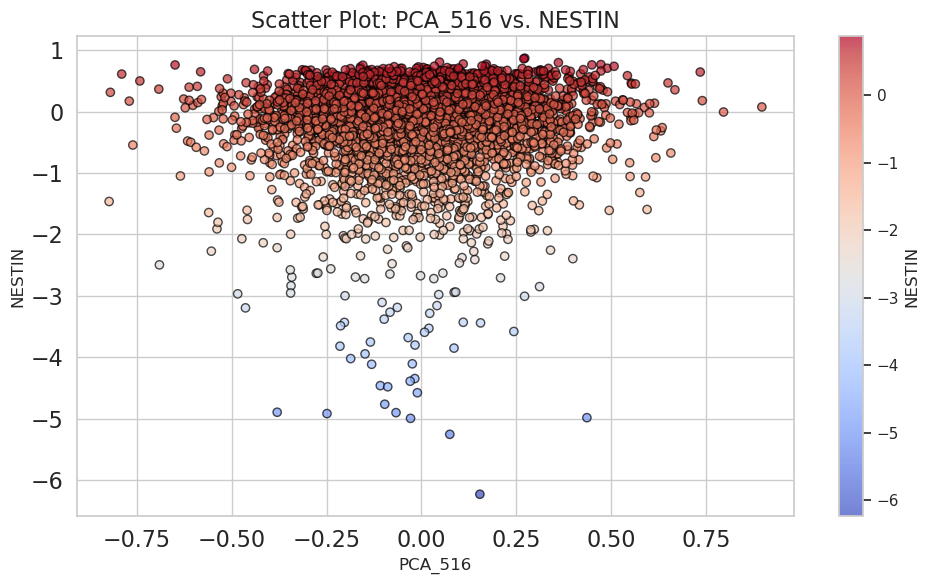

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_most_predictive_pca_feature(X_pca, y, target_variable, pca_feature_prefix='PCA_', scatter_kwargs=None, **plot_kwargs):
    # DataFrame conversion for PCA features
    df_pca = pd.DataFrame(X_pca, columns=[f'{pca_feature_prefix}{i}' for i in range(X_pca.shape[1])])

    # Concatenate PCA features with the target variable into one DataFrame
    df_final = pd.concat([df_pca, y.rename(target_variable)], axis=1)

    # Calculate the correlation of each PCA feature with the target variable
    correlations = df_final.corr()[target_variable].drop(target_variable)

    # Identify the PCA feature with the highest absolute correlation to the target variable
    most_predictive_feature = correlations.abs().idxmax()
    most_predictive_correlation = correlations.abs().max()

    # Print the most predictive PCA feature and its correlation
    print(f"The most predictive PCA feature is {most_predictive_feature} with a correlation of {most_predictive_correlation:.4f}.")

    # Generate a scatter plot for the most predictive PCA feature against the target variable
    if scatter_kwargs is None:
        scatter_kwargs = {}

    # Define colormap
    cmap = plt.cm.coolwarm

    # Normalize colormap to the range of predicted values
    norm = plt.Normalize(df_final[target_variable].min(), df_final[target_variable].max())

    # Plot scatter plot with colormap
    plt.figure(figsize=(10, 6))
    plt.scatter(x=df_final[most_predictive_feature], y=df_final[target_variable], c=df_final[target_variable], cmap=cmap, norm=norm, edgecolor='black', **scatter_kwargs)

    # Add colorbar
    cbar = plt.colorbar(label=target_variable)

    # Set plot title
    plt.title(f'Scatter Plot: {most_predictive_feature} vs. {target_variable}', **plot_kwargs)

    # Set xlabel and ylabel
    plt.xlabel(most_predictive_feature, **plot_kwargs.get('xlabel', {}))
    plt.ylabel(target_variable, **plot_kwargs.get('ylabel', {}))

    # Set xticks and yticks font size
    plt.xticks(fontsize=plot_kwargs['fontsize'])
    plt.yticks(fontsize=plot_kwargs['fontsize'])

    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming X_pca and y are already defined
# Load the target variable from metadata
metadata = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')
training_validation_specimens = ['A1', 'B1', 'D1']
metadata['specimen_id'] = metadata.VisSpot.apply(lambda x: x.split('-')[2])  # Create specimen id field
metadata = metadata[metadata['specimen_id'].isin(training_validation_specimens)]
y = metadata['NESTIN']

# Call the function with PCA features and target variable, and customize the scatter plot
scatter_kwargs = {'marker': 'o', 'alpha': 0.7}  # Example: change marker style and transparency
plot_kwargs = {'fontsize': 16}  # Example: change title font size
visualize_most_predictive_pca_feature(X_pca, y, 'NESTIN', scatter_kwargs=scatter_kwargs, **plot_kwargs)


The PCA features are condensed representations of the original picture data that retain the majority of the variation, particularly PCA_842, which has the strongest correlation with the target variable (NESTIN expression). The comparatively poor association between the PCA_842 feature and NESTIN expression is 0.0528. This implies that, although a linear connection exists, it is not very strong, and thus PCA_842 by itself might not be a reliable indicator of NESTIN expression.


# ii)

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2hed
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
# Load the training data (assuming file paths are provided)

# Filter training data based on groups A1, B1, D1
train = df[df['specimen_id'].isin(['A1', 'B1', 'D1'])]

# Filter test data based on group C1
test = df[df['specimen_id'] == 'C1']

def extract_features(images):
    features = []
    for img_path in images:
        # Load image
        img = imread("patches_256/" + img_path + ".png")
        # Convert to HED color space
        if img.shape[-1] == 4:
            image_rgb = rgba2rgb(img)
        else:
            image_rgb = img
        # Resize image
        image_resized = resize(image_rgb, (64, 64), anti_aliasing=True)
        # Convert to HED color space
        image_hed = rgb2hed(image_resized)
        # Extract channels
        H_channel = image_hed[:, :, 0].flatten()
        R_channel = image_resized[:, :, 0].flatten()
        G_channel = image_resized[:, :, 1].flatten()
        B_channel = image_resized[:, :, 2].flatten()
        # Concatenate channels
        flat_features = np.concatenate([H_channel, R_channel, G_channel, B_channel])
        features.append(flat_features)
    return np.array(features)

In [ ]:
# Extract features from training data
X_train_images = train['image_id'].values  # Assuming image paths are provided in the CSV
X_train = extract_features(X_train_images)

# Extract features from test data
X_test_images = test['image_id'].values  # Assuming image paths are provided in the CSV
X_test = extract_features(X_test_images)

In [ ]:
# Perform PCA
pca = PCA(n_components=0.95)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_test_pca = pca.transform(X_test)


OLS Model Results:
RMSE: 0.6155156696396116
Pearson Correlation Coefficient: 0.4956972642175912
Spearman Correlation Coefficient: 0.5492895328563433
R2 Score: 0.1351000480117065


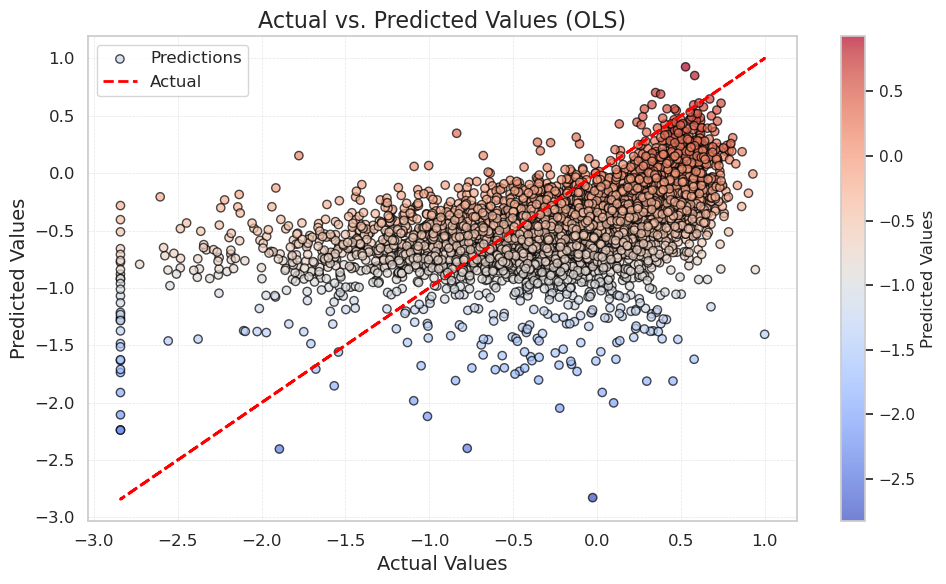

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
def train_and_evaluate_ols(X_train, y_train, X_test, y_test):
    # Fit OLS model
    X_train_const = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train, X_train_const).fit()
    X_test_const = sm.add_constant(X_test)
    predictions = ols_model.predict(X_test_const)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse_ols = np.sqrt(mse)
    pearson_corr_ols, _ = pearsonr(y_test, predictions)
    spearman_corr_ols, _ = spearmanr(y_test, predictions)
    r2_ols = r2_score(y_test, predictions)

    # Print evaluation results
    print("\nOLS Model Results:")
    print(f"RMSE: {rmse_ols}")
    print(f"Pearson Correlation Coefficient: {pearson_corr_ols}")
    print(f"Spearman Correlation Coefficient: {spearman_corr_ols}")
    print(f"R2 Score: {r2_ols}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, c=predictions, cmap='coolwarm', edgecolor='black', label='Predictions', alpha=0.7)
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual', linewidth=2)
    plt.title('Actual vs. Predicted Values (OLS)', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.colorbar(label='Predicted Values')
    plt.tight_layout()
    plt.show()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Train and evaluate OLS model separately
train_and_evaluate_ols(X_train_scaled, train['NESTIN'], X_test_scaled, test['NESTIN'])


**Visualization:**

A range of forecasts can be seen in the OLS scatter plot, several of which are quite near to the dashed line showing the actual values. Although the spread, particularly for mid-range actual values, indicates dispersion in forecasts, the trend points to a favourable association. It appears to overpredict at higher values and underestimate at lower real values, similar to the SVR model, suggesting possible biases or model limits.



SVR Model Results:
RMSE: 0.598201635875145
Pearson Correlation Coefficient: 0.5175300309956938
Spearman Correlation Coefficient: 0.5957693328568776
R2 Score: 0.18307377400117308


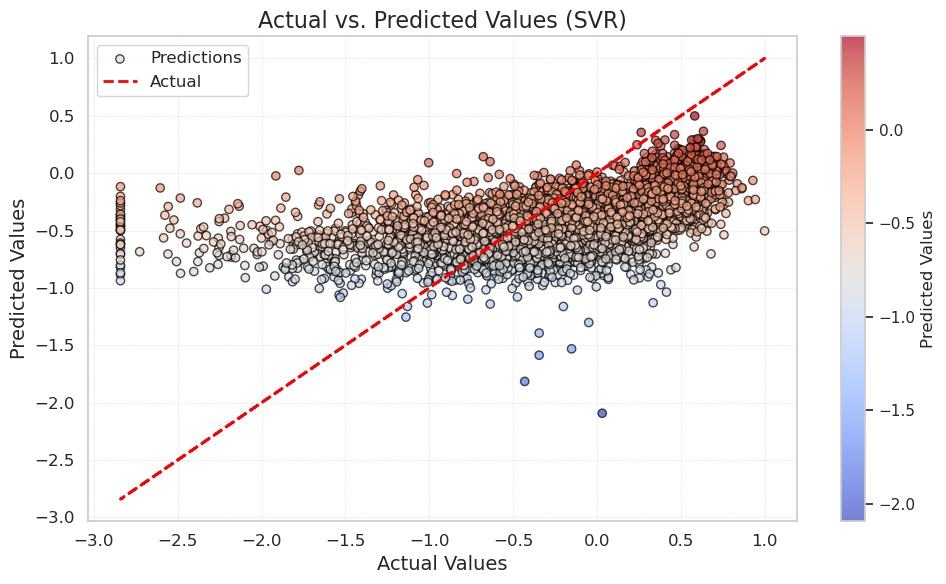

In [ ]:
from sklearn.svm import SVR

def train_and_evaluate_svr(X_train, y_train, X_test, y_test):
    # Fit SVR model
    svr_model = SVR(C=1.0, epsilon=0.2)
    svr_model.fit(X_train, y_train)
    predictions = svr_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse_svr = np.sqrt(mse)
    pearson_corr_svr, _ = pearsonr(y_test, predictions)
    spearman_corr_svr, _ = spearmanr(y_test, predictions)
    r2_svr = r2_score(y_test, predictions)

    # Print evaluation results
    print("\nSVR Model Results:")
    print(f"RMSE: {rmse_svr}")
    print(f"Pearson Correlation Coefficient: {pearson_corr_svr}")
    print(f"Spearman Correlation Coefficient: {spearman_corr_svr}")
    print(f"R2 Score: {r2_svr}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, c=predictions, cmap='coolwarm', edgecolor='black', label='Predictions', alpha=0.7)
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual', linewidth=2)
    plt.title('Actual vs. Predicted Values (SVR)', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.colorbar(label='Predicted Values')
    plt.tight_layout()
    plt.show()


# Train and evaluate SVR model separately
train_and_evaluate_svr(X_train_scaled, train['NESTIN'], X_test_scaled, test['NESTIN'])


**visualization:**

The SVR model's scatter plot reveals a somewhat favourable correlation between the actual and projected values. The line of perfect prediction is where most forecasts lie, although there is a discernible departure at the extremes. For lower real values, the model tends to underestimate, while for larger values, it tends to overpredict. Better model accuracy for average values is shown by the density of dots surrounding the centre. The plot indicates that the model's performance might be enhanced, especially at high values.


**Model Performance:**


*   **OLS (Ordinary Least Squares) Model:**

              RMSE: 0.6155156696396116
              Pearson Correlation Coefficient: 0.4956972642175912
              Spearman Correlation Coefficient: 0.5492895328563433
              R2 Score: 0.1351000480117065


*  ** VR (Support Vector Regression) Model:**

             RMSE: 0.598201635875145
             Pearson Correlation Coefficient: 0.5175300309956938
             Spearman Correlation Coefficient: 0.5957693328568776
             R2 Score: 0.18307377400117308
Based on the RMSE and R2 scores, the performance of the OLS and SVR models is comparable. Due to their low R2 values, both models are only able to partially explain the variation in NESTIN expression. The fairly positive Pearson and Spearman correlation coefficients imply a linear and monotonic relationship between the expected and actual values, but they also show that the prediction's accuracy is not very good.







**Most Predictive Feature and Model Selection:**

1. Despite being the most predictive PCA feature, PCA 842 has a poor connection with NESTIN expression according on the metrics. It should not be the only factor used for prediction; it may be useful in conjunction with other characteristics.

2. SVR's somewhat higher Pearson and Spearman correlation than that of the other model implies that the relationships it captures between the target variable and its attributes may be a little more intricate than what a linear OLS model can manage. The variations are slight, though.


# Question No. 3 (Using Convolutional Neural Networks)

# (i)

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torch.optim import Adam
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr


class CustomImageDataset(Dataset):
    def __init__(self, img_dir, df, transform=None, train=True):
        self.img_dir = img_dir
        self.transform = transform
        self.df = df
        self.train = train
        self.img_paths, self.labels = self._get_img_paths_and_labels()

    def _get_img_paths_and_labels(self):
        img_paths = []
        labels = []
        for filename in glob.glob(os.path.join(self.img_dir, '*.png')):
            img_id = os.path.basename(filename).split('.')[0]
            specimen_id = img_id.split('_')[0]
            if self.train and specimen_id in ['A1', 'B1', 'D1']:
                img_paths.append(filename)
                if img_id in self.df.index:
                    labels.append(self.df.loc[img_id, 'NESTIN'])  # Fetch the NESTIN label
                else:
                    labels.append(0)  # Default/fallback value
            elif not self.train and specimen_id == 'C1':
                img_paths.append(filename)
                if img_id in self.df.index:
                    labels.append(self.df.loc[img_id, 'NESTIN'])  # Fetch the NESTIN label
                else:
                    labels.append(0)  # Default/fallback value
        return img_paths, labels

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')  # Convert to RGB
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Imagenet standards
])

# Instantiate the dataset
train_dataset = CustomImageDataset(img_dir='patches_256/', df=train, transform=transform, train=True)
test_dataset = CustomImageDataset(img_dir='patches_256/', df=test, transform=transform, train=False)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
class NESTINCNN(nn.Module):
    def __init__(self, num_classes=1):
        super(NESTINCNN, self).__init__()
        # Load a pre-trained ResNet and modify it
        self.resnet = models.resnet50(pretrained=True)

        # Replace the classifier part of the ResNet with custom layers
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),  # Outputting a single value for regression
        )

    def forward(self, x):
        return self.resnet(x)

/home/guhan/miniforge3/envs/rapids-23.12/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guhan/miniforge3/envs/rapids-23.12/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Average Loss: 0.3067
Epoch 2/5, Average Loss: 0.2291
Epoch 3/5, Average Loss: 0.2176
Epoch 4/5, Average Loss: 0.2170
Epoch 5/5, Average Loss: 0.2071


/tmp/ipykernel_13332/3581544792.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


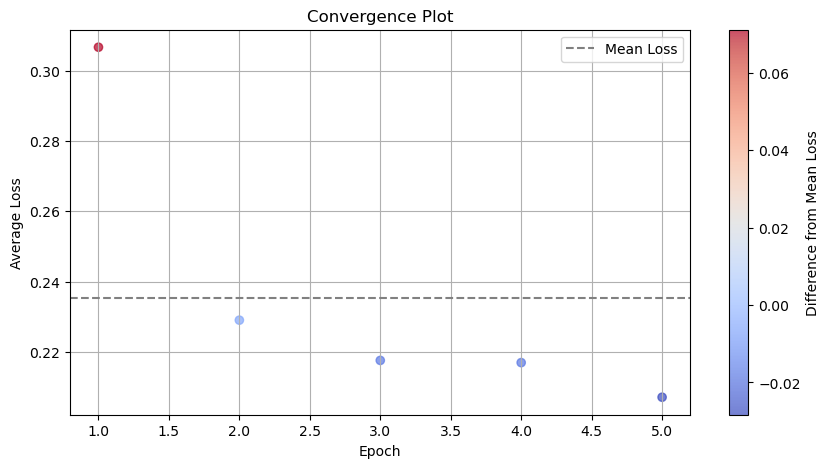

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        num_batches = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            num_batches += 1

        epoch_loss = total_loss / num_batches
        epoch_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {epoch_loss:.4f}')

    return epoch_losses

def plot_convergence(epoch_losses):
    # Calculate the difference between the loss and the mean loss
    mean_loss = np.mean(epoch_losses)
    diff = np.array(epoch_losses) - mean_loss

    # Define color map
    cmap = plt.cm.get_cmap('coolwarm')

    # Handle NaN values in the difference array
    valid_diff = np.where(~np.isnan(diff), diff, 0)

    # Plot convergence with diverging color mapping
    plt.figure(figsize=(10, 5))
    plt.scatter(range(1, len(epoch_losses) + 1), epoch_losses, c=valid_diff, cmap=cmap, alpha=0.7)
    plt.colorbar(label='Difference from Mean Loss')

    # Add horizontal line at the mean loss
    plt.axhline(y=mean_loss, color='gray', linestyle='--', label='Mean Loss')

    # Label axes and add title
    plt.title('Convergence Plot')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()


# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'train_dataset', 'test_dataset', 'NESTINCNN' are defined elsewhere
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = NESTINCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 5
epoch_losses = train_model(model, train_loader, criterion, optimizer, num_epochs, device)
plot_convergence(epoch_losses)


RMSE: 0.6301944255828857
Pearson Correlation Coefficient: 0.5852549493417534
Spearman Correlation Coefficient: 0.6666046743521573
R2 Score: 0.07933860988271224


/tmp/ipykernel_13332/1293240997.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


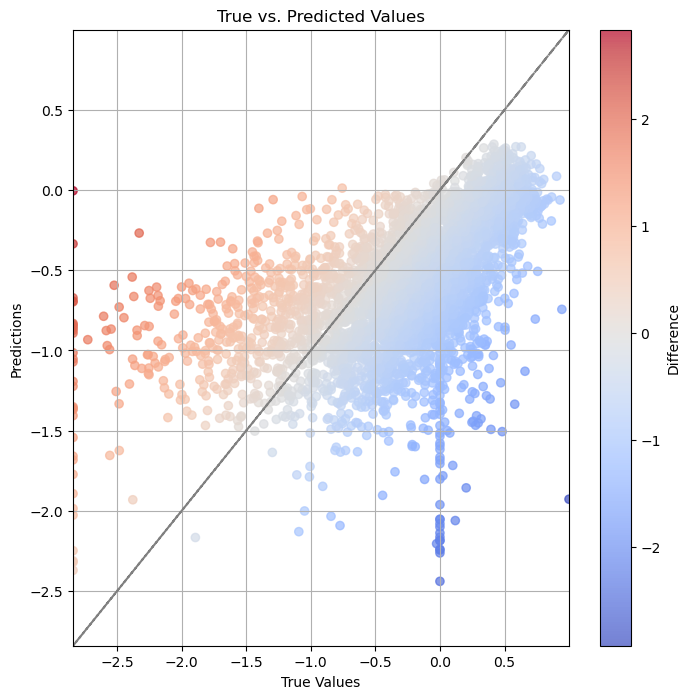

In [ ]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    predictions = []
    true_values = []

    with torch.no_grad():  # Inference without gradient calculation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            predictions.extend(outputs.squeeze().cpu().numpy())
            true_values.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    rmse_cnn = np.sqrt(mean_squared_error(true_values, predictions))
    pearson_corr_cnn, _ = pearsonr(true_values, predictions)
    spearman_corr_cnn, _ = spearmanr(true_values, predictions)
    r2_cnn = r2_score(true_values, predictions)

    print(f"RMSE: {rmse_cnn}")
    print(f"Pearson Correlation Coefficient: {pearson_corr_cnn}")
    print(f"Spearman Correlation Coefficient: {spearman_corr_cnn}")
    print(f"R2 Score: {r2_cnn}")

    return true_values, predictions

def plot_true_vs_predicted(true_values, predictions):
    # Calculate the difference between true values and predictions
    diff = np.array(predictions) - np.array(true_values)

    # Define color map
    cmap = plt.cm.get_cmap('coolwarm')

    # Scatter plot with diverging color mapping
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predictions, c=diff, cmap=cmap, alpha=0.7)
    plt.colorbar(label='Difference')

    # Add a diagonal reference line
    plt.plot(true_values, true_values, color='gray', linestyle='--')

    # Label axes
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs. Predicted Values')

    # Set axis limits
    min_val = min(min(true_values), min(predictions))
    max_val = max(max(true_values), max(predictions))
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    # Show plot
    plt.grid(True)
    plt.show()


# Usage
true_values, predictions = evaluate_model(model, test_loader, device)
plot_true_vs_predicted(true_values, predictions)


# ii)

Training for Specimen - A1 and Protein - EGFR
Epoch 1/2, Loss: 0.4609
Epoch 2/2, Loss: 0.0359
RMSE: 0.44702407717704773
Pearson Correlation: 0.1838161965334134
Spearman Correlation: 0.10665236250460516
R2 Score: 0.00885220022872868


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


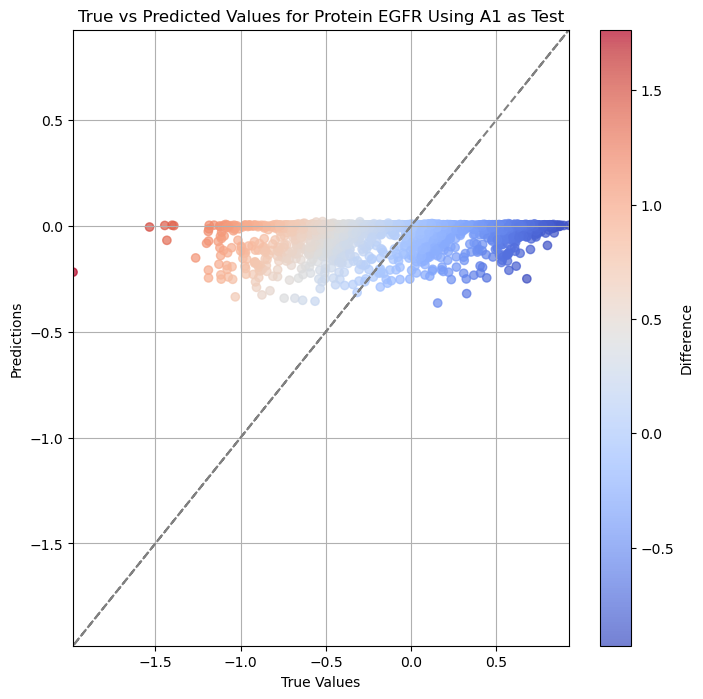

Training for Specimen - A1 and Protein - PTEN
Epoch 1/2, Loss: 1.6451
Epoch 2/2, Loss: 1.4017
RMSE: 1.0075082778930664
Pearson Correlation: nan
Spearman Correlation: nan
R2 Score: -0.011365432522034258


/tmp/ipykernel_13332/2304897116.py:145: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(targets, predictions)
/tmp/ipykernel_13332/2304897116.py:146: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(targets, predictions)
/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


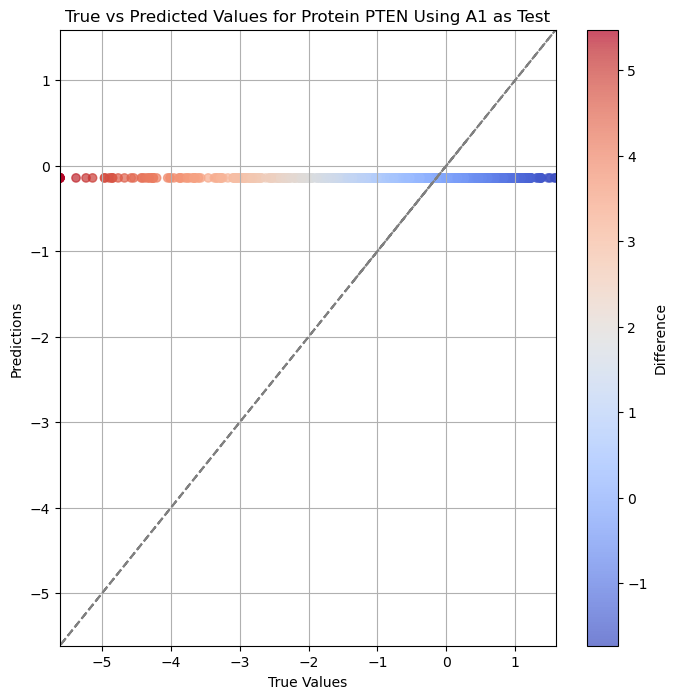

Training for Specimen - A1 and Protein - NESTIN
Epoch 1/2, Loss: 2.0128
Epoch 2/2, Loss: 0.2161
RMSE: 0.6772968769073486
Pearson Correlation: 0.5656064995012697
Spearman Correlation: 0.7111679508107699
R2 Score: 0.2990284367398254


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


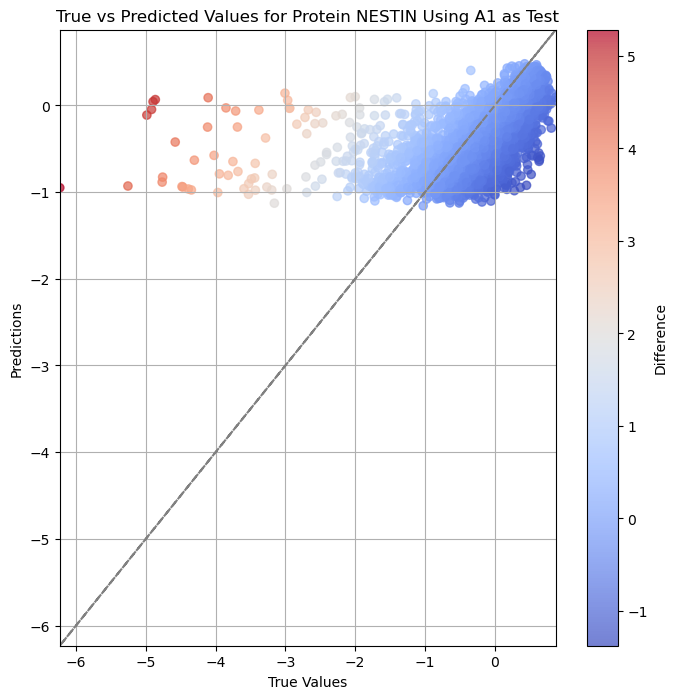

Training for Specimen - A1 and Protein - SOX2
Epoch 1/2, Loss: 0.9087
Epoch 2/2, Loss: 0.5692
RMSE: 1.0873034000396729
Pearson Correlation: 0.4770966846228125
Spearman Correlation: 0.6127515545863739
R2 Score: 0.19105227871061603


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


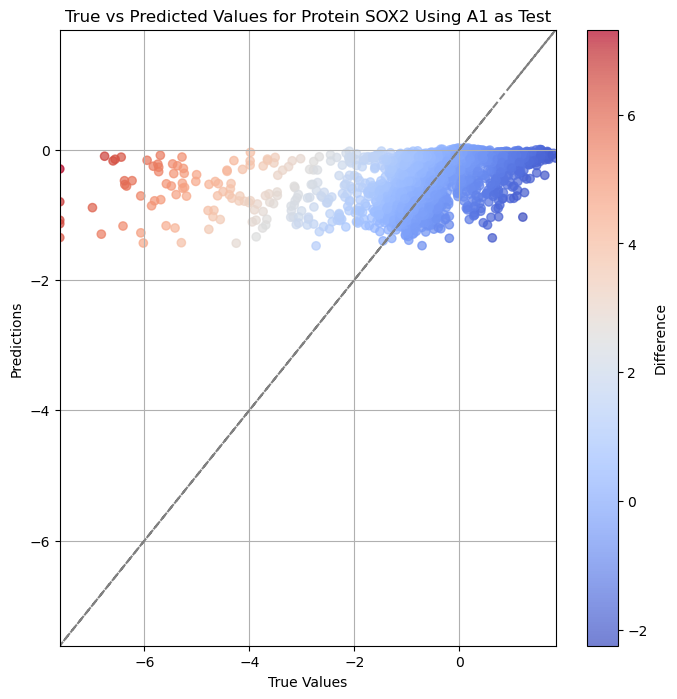

Training for Specimen - A1 and Protein - MET
Epoch 1/2, Loss: 0.8886
Epoch 2/2, Loss: 0.7177
RMSE: 0.6770197749137878
Pearson Correlation: 0.5030257781742855
Spearman Correlation: 0.36202564429701395
R2 Score: 0.25122094653427074


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - B1 and Protein - EGFR
Epoch 1/2, Loss: 0.1974
Epoch 2/2, Loss: 0.0658
RMSE: 0.28923046588897705
Pearson Correlation: -0.22062854369940715
Spearman Correlation: -0.21871325249889004
R2 Score: -0.6848715559874938


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


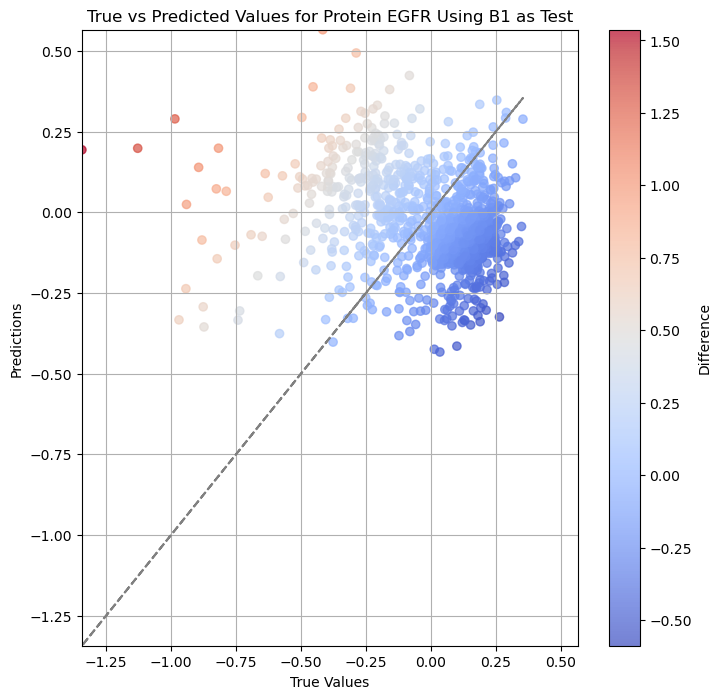

Training for Specimen - B1 and Protein - PTEN
Epoch 1/2, Loss: 1.1278
Epoch 2/2, Loss: 0.7948
RMSE: 0.9532281756401062
Pearson Correlation: 0.6175934485893717
Spearman Correlation: 0.24060048377078855
R2 Score: 0.32063110835980035


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


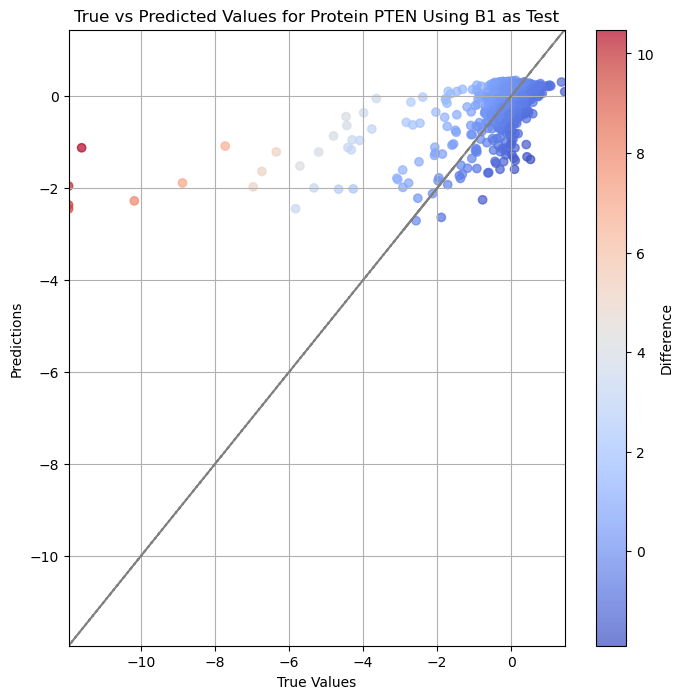

Training for Specimen - B1 and Protein - NESTIN
Epoch 1/2, Loss: 1.0235
Epoch 2/2, Loss: 0.2583
RMSE: 0.4728616178035736
Pearson Correlation: 0.5549308716478676
Spearman Correlation: 0.434543054741276
R2 Score: 0.24445268576243917


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - B1 and Protein - SOX2
Epoch 1/2, Loss: 1.1556
Epoch 2/2, Loss: 0.7165
RMSE: 0.9774759411811829
Pearson Correlation: -0.07546952110178975
Spearman Correlation: -0.19092866026495056
R2 Score: -0.5789580455229641


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - B1 and Protein - MET
Epoch 1/2, Loss: 1.0968
Epoch 2/2, Loss: 0.6045
RMSE: 0.7780517935752869
Pearson Correlation: 0.45624803544955295
Spearman Correlation: -0.07876866383348013
R2 Score: 0.1776089376609723


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


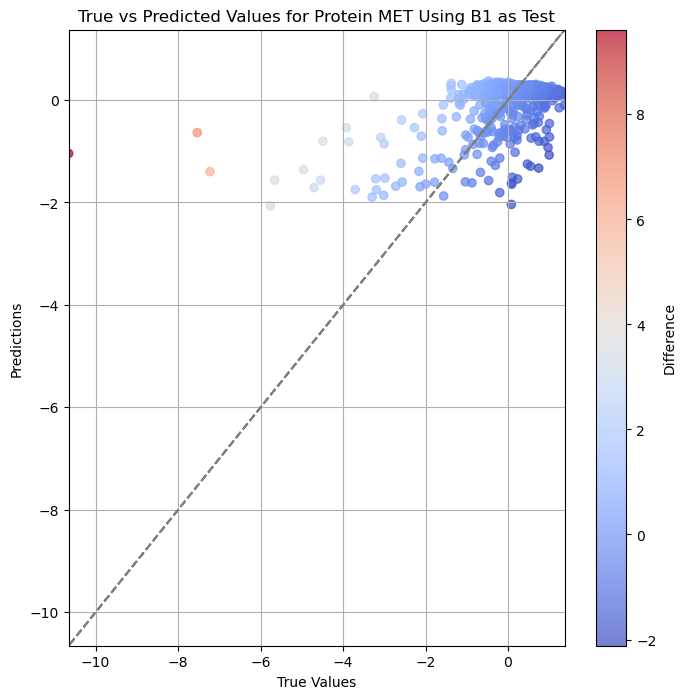

Training for Specimen - C1 and Protein - EGFR
Epoch 1/2, Loss: 1.2417
Epoch 2/2, Loss: 0.0890
RMSE: 0.21449369830036555
Pearson Correlation: 0.26459276995925063
Spearman Correlation: 0.2687430133780544
R2 Score: -0.4072897872520911


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


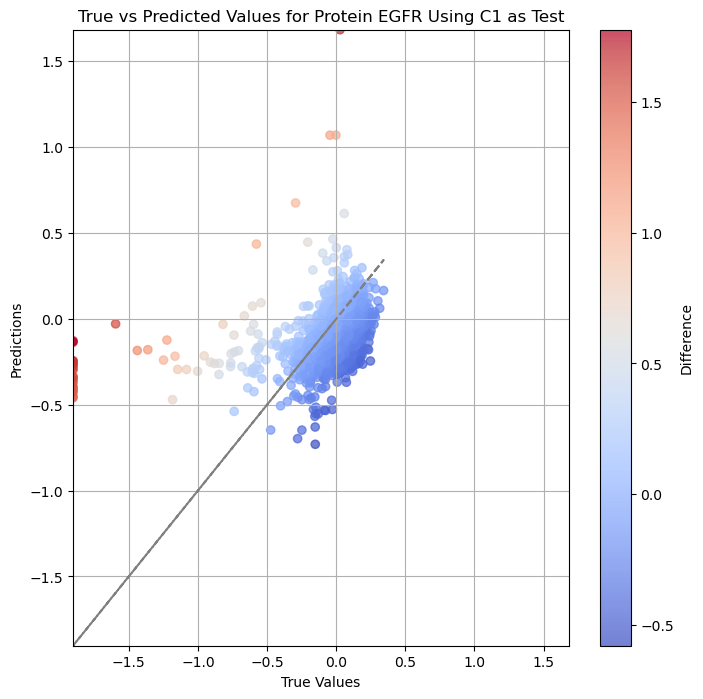

Training for Specimen - C1 and Protein - PTEN
Epoch 1/2, Loss: 3.8669
Epoch 2/2, Loss: 0.8620
RMSE: 0.9998019494334769
Pearson Correlation: 0.6394990316312302
Spearman Correlation: -0.003998372570930799
R2 Score: 0.2562208186166962


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


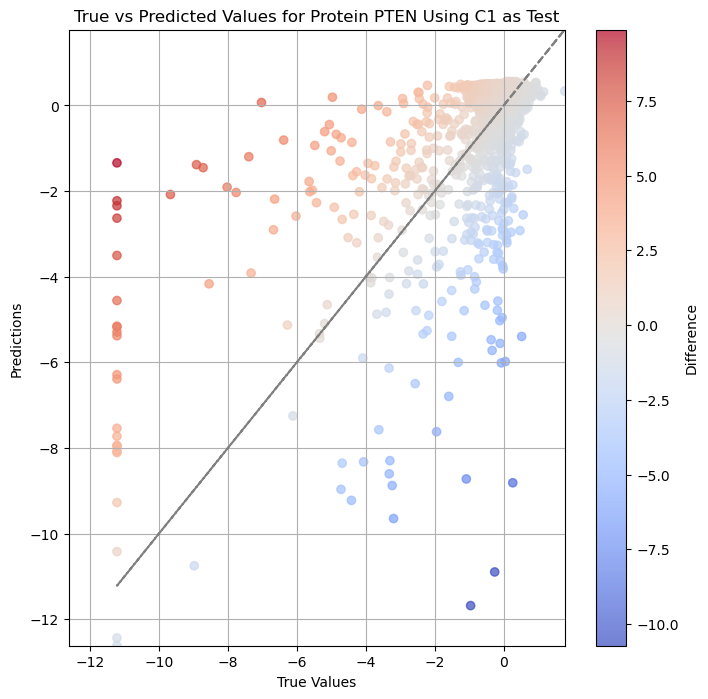

Training for Specimen - C1 and Protein - NESTIN
Epoch 1/2, Loss: 1.6280
Epoch 2/2, Loss: 0.2855
RMSE: 0.748874867452578
Pearson Correlation: 0.5650000718528829
Spearman Correlation: 0.5876165652615275
R2 Score: -0.2802834890046033


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - C1 and Protein - SOX2
Epoch 1/2, Loss: 2.8133
Epoch 2/2, Loss: 0.7971
RMSE: 0.8824232317895759
Pearson Correlation: 0.5966771633837549
Spearman Correlation: 0.6565799248785027
R2 Score: 0.15721971888622654


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - C1 and Protein - MET
Epoch 1/2, Loss: 2.1480
Epoch 2/2, Loss: 0.4401
RMSE: 0.9374632812704129
Pearson Correlation: 0.5396070785823641
Spearman Correlation: 0.21682773534579633
R2 Score: 0.24307067376311775


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - D1 and Protein - EGFR
Epoch 1/2, Loss: 0.4414
Epoch 2/2, Loss: 0.0652
RMSE: 0.2630920112133026
Pearson Correlation: 0.44956781732111506
Spearman Correlation: 0.4619341358444199
R2 Score: -0.45754648690039246


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


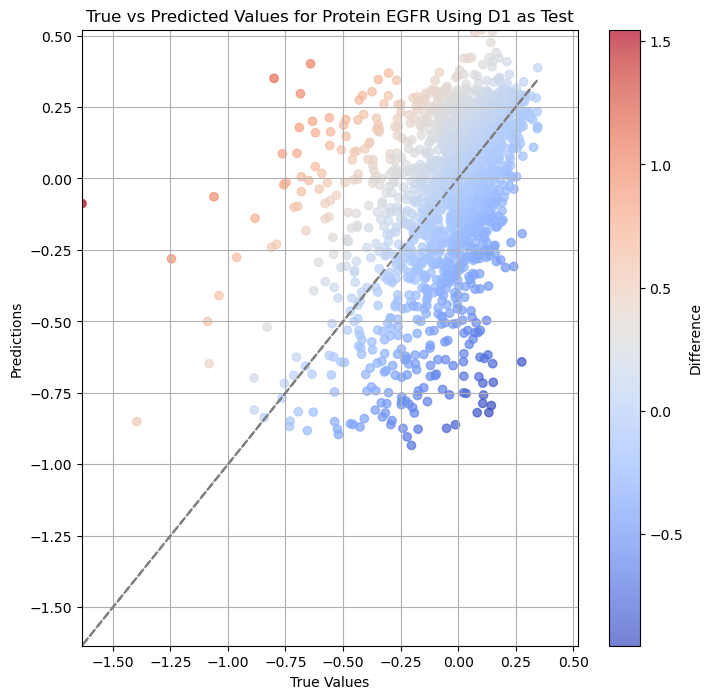

Training for Specimen - D1 and Protein - PTEN
Epoch 1/2, Loss: 1.2626
Epoch 2/2, Loss: 0.8396
RMSE: 1.4910608530044556
Pearson Correlation: 0.677265640220739
Spearman Correlation: 0.6674827937142785
R2 Score: -0.44677952897890183


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


Training for Specimen - D1 and Protein - NESTIN
Epoch 1/2, Loss: 1.0081
Epoch 2/2, Loss: 0.2886
RMSE: 0.4437914490699768
Pearson Correlation: 0.548166298024892
Spearman Correlation: 0.5429043096980809
R2 Score: -0.2654703612594185


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


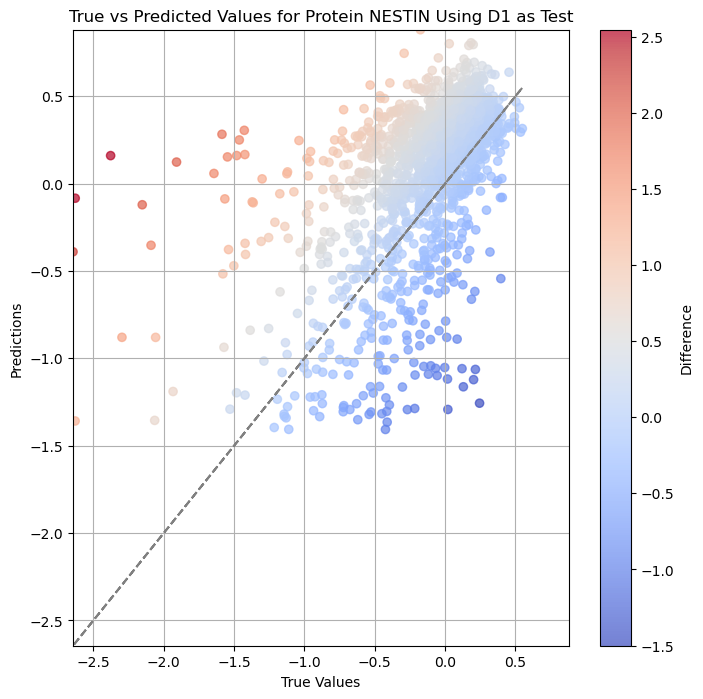

Training for Specimen - D1 and Protein - SOX2
Epoch 1/2, Loss: 1.3107
Epoch 2/2, Loss: 0.7671
RMSE: 0.7069299817085266
Pearson Correlation: 0.5663482312808401
Spearman Correlation: 0.5293574240400369
R2 Score: 0.2210668235126113


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


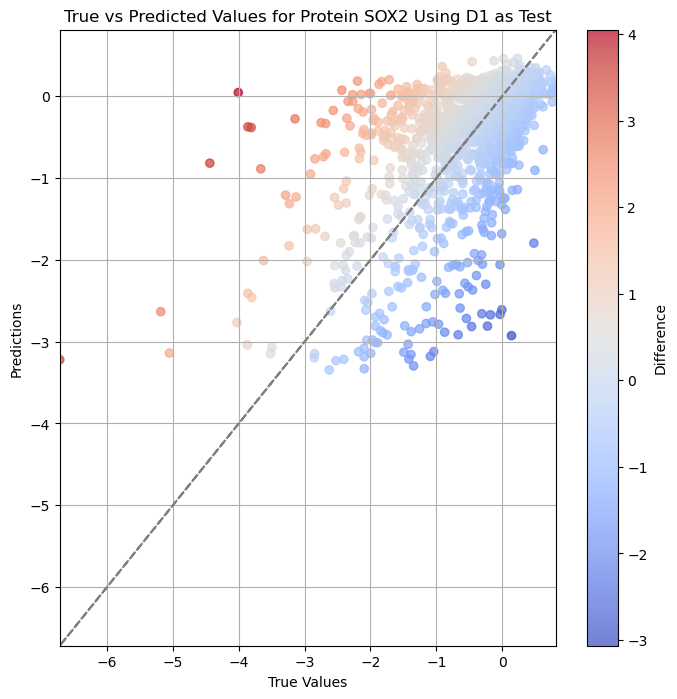

Training for Specimen - D1 and Protein - MET
Epoch 1/2, Loss: 1.2136
Epoch 2/2, Loss: 0.6568
RMSE: 0.6438824534416199
Pearson Correlation: 0.736886328861469
Spearman Correlation: 0.6577012469159769
R2 Score: 0.4372247040137851


/tmp/ipykernel_13332/2304897116.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


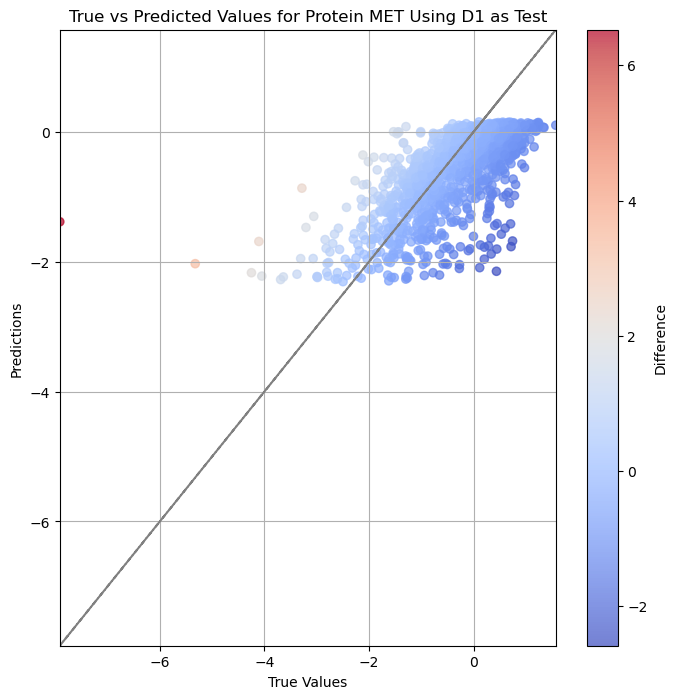

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

proteins = ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#creating a class to to load images and target values
class CustomDataset(Dataset):
    def __init__(self, csv_file, target_column, image_column='image_id', transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.transform = transform
        self.image_column = image_column
        self.target_column = target_column

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        image_name = os.path.join(image_folder, self.data_frame.loc[idx, self.image_column])
        image_path = image_name + '.png'
        image = Image.open(image_path)
        if image.mode == 'RGBA':
            image = image.convert('RGB')
        image_resized = image.resize((256, 256))
        target = torch.tensor(self.data_frame.loc[idx, self.target_column], dtype=torch.float32)

        if self.transform:
            image_resized = self.transform(image_resized)

        return image_resized, target

# Define image transformations and create DataLoader
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.fc1 = nn.Linear(128 * 30 * 30, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 30 * 30)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train the model
def train_model(model, criterion, optimizer, train_loader, specimen, protein, num_epochs=2):
    print("Training for Specimen - " + specimen + " and Protein - " + protein)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs).squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for prediction, target in test_loader:
            prediction, target = prediction.to(device), target.to(device)
            outputs = model(prediction)
            if isinstance(outputs, torch.Tensor):  # Check if outputs is a tensor
                outputs = outputs.squeeze()
                if len(outputs.shape) > 0:
                    predictions.extend(outputs.cpu().numpy())  # Convert tensor to numpy array
                else:
                    predictions.append(outputs.item())  # Append scalar value directly
            else:  # Handle single scalar output
                predictions.append(outputs)  # No need to convert, it's already a scalar
            targets.extend(target.cpu().numpy())  # Convert tensor to numpy array
    return predictions, targets

# Function to split data into train and test sets
def cross(df):
    for specimen, group in df.groupby('specimen_id'):
        train_df = df[df['specimen_id'] != specimen]  # Training set
        test_df = group  # Test set

        train_df.to_csv('train.csv', index=False)
        test_df.to_csv('test.csv', index=False)


        for protein in proteins:

            train_dataset = CustomDataset(csv_file='train.csv', target_column=protein, transform=transform)
            test_dataset = CustomDataset(csv_file='test.csv', target_column=protein, transform=transform)

            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

            # Step 4: Instantiate the model, loss function, and optimizer
            model = Net().to(device)

            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)

            train_model(model, criterion, optimizer, train_loader, specimen, protein)

            predictions, targets = evaluate_model(model, test_loader)

            mse = mean_squared_error(targets, predictions)
            rmse = np.sqrt(mse)
            pearson_corr, _ = pearsonr(targets, predictions)
            spearman_corr, _ = spearmanr(targets, predictions)
            r2 = r2_score(targets, predictions)

            print(f"RMSE: {rmse}")
            print(f"Pearson Correlation: {pearson_corr}")
            print(f"Spearman Correlation: {spearman_corr}")
            print(f"R2 Score: {r2}")

            # Calculate the difference between true values and predictions
            diff = np.array(predictions) - np.array(targets)

            # Define color map
            cmap = plt.cm.get_cmap('coolwarm')

            # Scatter plot with diverging color mapping
            plt.figure(figsize=(8, 8))
            plt.scatter(targets, predictions, c=diff, cmap=cmap, alpha=0.7)
            plt.colorbar(label='Difference')

            # Add a diagonal reference line
            plt.plot(targets, targets, color='gray', linestyle='--')

            # Label axes
            plt.xlabel('True Values')
            plt.ylabel('Predictions')
            plt.title('True vs Predicted Values' + ' for Protein ' + protein + ' Using ' + specimen + ' as Test')

            # Set axis limits
            min_val = min(min(targets), min(predictions))
            max_val = max(max(targets), max(predictions))
            plt.xlim(min_val, max_val)
            plt.ylim(min_val, max_val)

            # Show plot
            plt.grid(True)
            plt.show()



# Call the cross function
cross(df)

# iii)Discuss limitations and possible extensions of the optimal pipeline, e.g., is there any additional information we can utilize to improve prediction performance and how that can be used?  You will be graded on the feasibility and practicality of your ideas and you can get bonus marks depending upon whether you show any preliminary or pilot results.

There are certain limits and room for development with the best pipeline for protein prediction in this assignment. The amount and variety of available data is a major limitation. Large and diverse datasets are essential for deep learning models, the core of your pipeline, to efficiently identify underlying trends. A small or undiversified dataset might make it more difficult for the model to generalise to new data, which could result in less than ideal performance. Moreover, the model's predictions may be biassed if the dataset has unequal class distributions, with some proteins being markedly overrepresented compared to others. This is especially true for minority classes.





Deep learning architectures are also prone to overfitting, a phenomenon in which the model learns by memorization of training samples rather than by recognising patterns that can be applied to other situations. Inadequate regularisation techniques or excessively complicated structures may be the cause of this. Furthermore, deep learning models' interpretability presents a problem as their complexity frequently makes it difficult to comprehend the reasoning behind the decisions made by the models, which is important for applications in biomedicine where interpretability is critical.


There are a number of ways to extend and improve the pipeline in order to overcome these drawbacks and raise its effectiveness. First, by exposing the model to a wider variety of data variances during training, including data augmentation approaches can help diversity the dataset and enhance model generalisation. By using pre-trained convolutional neural networks (CNNs) on large-scale picture datasets for transfer learning, you may also benefit from improved prediction performance and knowledge transfer from comparable tasks when you fine-tune these models on your protein dataset. By merging predictions from many models, ensemble learning techniques can reduce overfitting and identify a variety of patterns in the data, producing predictions that are more reliable.


Moreover, multi-modal data fusion approaches can improve predictive accuracy by combining different data modalities, such as gene expression profiles or protein-protein interaction networks, which can offer supplementary information for protein prediction. By highlighting significant characteristics, the CNN architecture's attention methods can help the model concentrate on pertinent areas of input pictures, which might enhance performance. Additionally, investigating interpretable machine learning models for feature significance analysis, including decision trees or linear models, might help with model interpretation and validation by offering insightful information about the underlying mechanisms behind predictions.

Moreover, fresh labelled data points that are most instructive for model training may be acquired in a priority manner using active learning procedures, which will lessen the workload associated with annotations and enhance prediction performance. Working with specialists in the fields of biology and bioinformatics may help to ensure that the predictive model is developed in accordance with the needs of the domain and research objectives. It can also yield insightful information relevant to the domain. Protein analysis and bioinformatics research can progress by improving the efficiency and interpretability of the protein prediction pipeline by tackling its constraints and investigating possible expansions.

In [4]:
import pandas as pd
# Collecting performance metrics for NESTIN trained models OLS, SVR and CNN
overall_performance_metrics = {
    'Model': ['OLS', 'SVR', 'CNN'],
    'RMSE': [0.6155156696396116, 0.598201635875145, 0.6301944255828857],
    'Pearson Corr.': [0.4956972642175912, 0.5175300309956938, 0.5852549493417534],
    'Spearman Corr.': [0.5492895328563433, 0.5957693328568776, 0.6666046743521573],
    'R2 Score': [0.1351000480117065, 0.18307377400117308, 0.07933860988271224]
}

# Creating a DataFrame from the performance metrics dictionary
overall_performance_metrics_df = pd.DataFrame(overall_performance_metrics)

# Displaying the DataFrame
print(overall_performance_metrics_df.to_string(index=False))

Model     RMSE  Pearson Corr.  Spearman Corr.  R2 Score
  OLS 0.615516       0.495697        0.549290  0.135100
  SVR 0.598202       0.517530        0.595769  0.183074
  CNN 0.630194       0.585255        0.666605  0.079339


In terms of RMSE and R2 Score, the SVR model performs the best, meaning it has the lowest error and provides the best explanation for the variation in the data.

The CNN model exhibits the highest linear connection and rank order preservation between predicted and actual values, doing exceptionally well in both the Pearson and Spearman Correlation Coefficients.


Choosing the model that is "best" overall will rely on what features are most crucial for your particular application. SVR may be better if minimising prediction error is important. CNN stands out if preserving the stability and order of relationships is more essential.
